# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    R - Identify any null or missing data, and impute appropriate replacement values.
    R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    R - View summary statistics for the numeric fields in the dataset.
    R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        R - *What are the average (mean) departure and arrival delays?*
        R - *How do the carriers compare in terms of arrival delay performance?*
        R - *Is there a noticable difference in arrival delays for different days of the week?*
        R - *Which departure airport has the highest average departure delay?*
        * - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        * - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        R - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.


In [12]:
# Your code to explore the data

import pandas as pd


df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [13]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [14]:
#Identifica cualquier dato nulo o faltante, e imputa los valores de reemplazo adecuados.
nulos_antes = df_flights['DepDel15'].isnull().sum()
print(f"Valores nulos en DepDel15 antes: {nulos_antes}")

# Actualizar DepDel15 basándose en DepDelay
df_flights['DepDel15'] = (df_flights['DepDelay'] > 15).astype(float)


# Verificar la consistencia entre DepDelay y DepDel15
inconsistencias = ((df_flights['DepDelay'] > 15) != (df_flights['DepDel15'] == 1)).sum()
print(f"Número de inconsistencias entre DepDelay y DepDel15: {inconsistencias}")


# Calcular el porcentaje de vuelos con retraso en la salida
porcentaje_retraso = (df_flights['DepDel15'] == 1).mean() * 100
print(f"\nPorcentaje de vuelos con retraso en la salida: {porcentaje_retraso:.2f}%")

Valores nulos en DepDel15 antes: 2761
Número de inconsistencias entre DepDelay y DepDel15: 0

Porcentaje de vuelos con retraso en la salida: 19.11%


In [15]:
#Identifica y elimina cualquier valor atípico en las columnas DepDelay y ArrDelay.

df_flights = df_flights[(df_flights['ArrDelay'] < 60 ) & (df_flights['DepDelay'] < 60)]

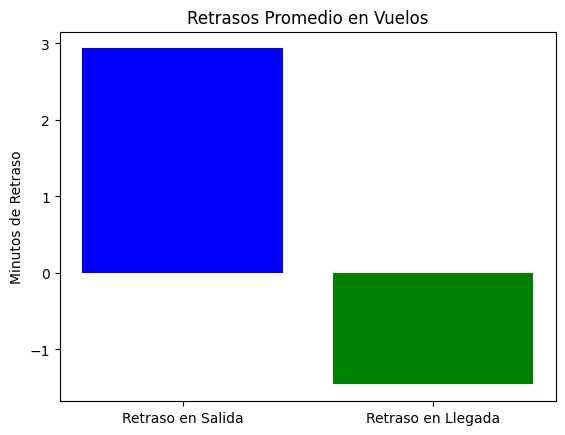

El retraso promedio en la salida es: 2.93 minutos
El retraso promedio en la llegada es: -1.46 minutos


In [16]:
#1 ¿Cuáles son los retrasos promedio (media) en la salida y llegada?
import matplotlib.pyplot as plt 

retraso_media_salida = df_flights['DepDelay'].mean()
retraso_media_llegada = df_flights['ArrDelay'].mean()

etiquetas = ['Retraso en Salida', 'Retraso en Llegada']
valores = [retraso_media_salida, retraso_media_llegada]
plt.bar(etiquetas, valores, color=['blue', 'green'])
plt.title('Retrasos Promedio en Vuelos')
plt.ylabel('Minutos de Retraso')

plt.show()
print(f"El retraso promedio en la salida es: {retraso_media_salida:.2f} minutos")
print(f"El retraso promedio en la llegada es: {retraso_media_llegada:.2f} minutos")

Carrier
9E   -4.743158
UA   -4.666312
DL   -4.125926
AS   -3.014433
VX   -2.891816
EV   -2.649151
AA   -2.215480
B6   -2.149301
HA   -1.959481
US   -1.567780
OO   -1.145860
YV   -1.023029
FL   -0.035474
MQ    0.735858
WN    2.396816
F9    3.506237
Name: ArrDelay, dtype: float64


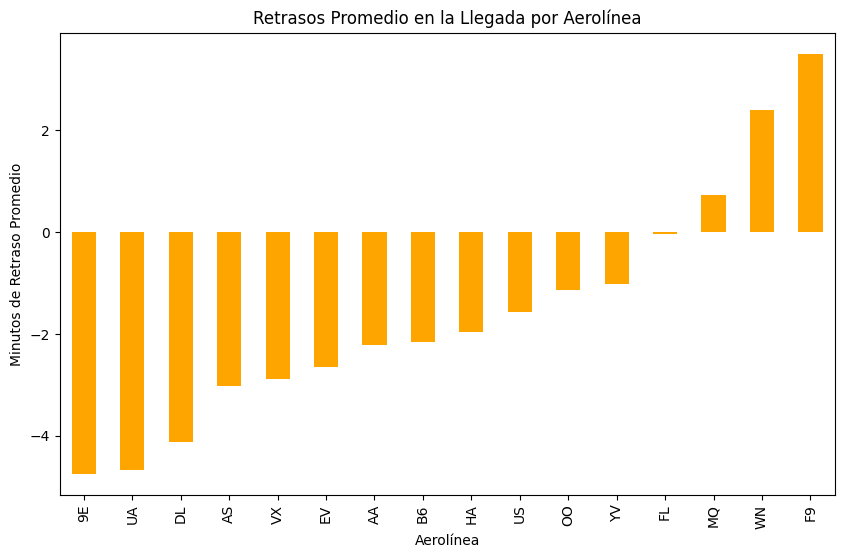

In [17]:
#2 ¿Cómo se comparan las aerolíneas en términos de desempeño de retrasos en la llegada?
retrasos_por_aerolinea = df_flights.groupby('Carrier')['ArrDelay'].mean()

# Ordenar los resultados de menor a mayor retraso promedio
retrasos_por_aerolinea = retrasos_por_aerolinea.sort_values()
print(retrasos_por_aerolinea)

plt.figure(figsize=(10,6))
retrasos_por_aerolinea.plot(kind='bar', color='orange')
plt.title('Retrasos Promedio en la Llegada por Aerolínea')
plt.ylabel('Minutos de Retraso Promedio')
plt.xlabel('Aerolínea')

plt.show()

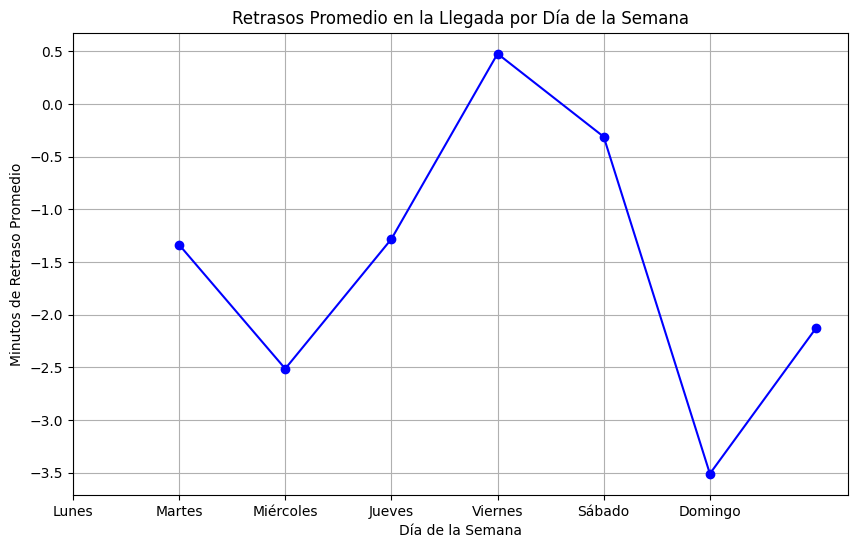

In [18]:
#3 ¿Hay una diferencia notable en los retrasos de llegada según el día de la semana?
retrasos_por_dia = df_flights.groupby('DayOfWeek')['ArrDelay'].mean()

dias_orden = [1, 2, 3, 4, 5, 6, 7] 
retrasos_por_dia = retrasos_por_dia.reindex(dias_orden)

plt.figure(figsize=(10,6))
plt.plot(retrasos_por_dia.index, retrasos_por_dia, marker='o', linestyle='-', color='blue')

plt.title('Retrasos Promedio en la Llegada por Día de la Semana')
plt.ylabel('Minutos de Retraso Promedio')
plt.xlabel('Día de la Semana')
plt.xticks(ticks=range(len(dias_orden)), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

plt.grid()
plt.show()

In [19]:
#4 ¿Qué aeropuerto de salida tiene el mayor retraso promedio en la salida?

retraso_por_aeropuerto = df_flights.groupby('OriginAirportName')['DepDelay'].mean()

aeropuerto_max_retraso = retraso_por_aeropuerto.idxmax()
max_retraso = retraso_por_aeropuerto.max()

print(f"El aeropuerto de salida con el mayor retraso promedio en la salida es: {aeropuerto_max_retraso}")


El aeropuerto de salida con el mayor retraso promedio en la salida es: Chicago Midway International


Tabla 1: Vuelos que despegaron a tiempo o antes
ArrDelay  False  True 
DepDelay              
True      18.16  81.84

Tabla 2: Vuelos que despegaron tarde
ArrDelay  False  True 
DepDelay              
True      67.02  32.98


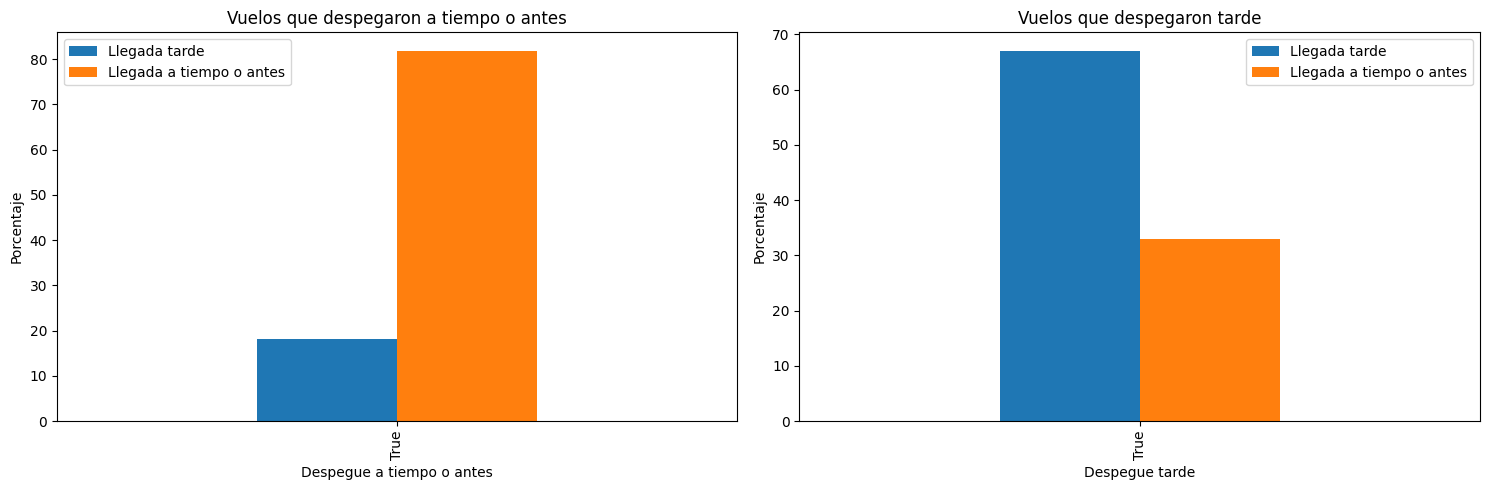

In [23]:
#5 ¿Los despegues tardíos tienden a resultar en retrasos más largos en la llegada que los despegues a tiempo?**

vuelos_a_tiempo = df_flights[df_flights['DepDelay'] <= 0]
tabla_a_tiempo = pd.crosstab(
    vuelos_a_tiempo['DepDelay'] <= 0,
    vuelos_a_tiempo['ArrDelay'] <= 0,
    normalize='index'
) * 100 

vuelos_tarde = df_flights[df_flights['DepDelay'] > 0]
tabla_tarde = pd.crosstab(
    vuelos_tarde['DepDelay'] > 0,
    vuelos_tarde['ArrDelay'] <= 0,
    normalize='index'
) * 100 

print("Tabla 1: Vuelos que despegaron a tiempo o antes")
print(tabla_a_tiempo.round(2))
print("\nTabla 2: Vuelos que despegaron tarde")
print(tabla_tarde.round(2))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

tabla_a_tiempo.plot(kind='bar', ax=ax1, width=0.35)
ax1.set_title('Vuelos que despegaron a tiempo o antes')
ax1.set_xlabel('Despegue a tiempo o antes')
ax1.set_ylabel('Porcentaje')
ax1.legend(['Llegada tarde', 'Llegada a tiempo o antes'])

tabla_tarde.plot(kind='bar', ax=ax2, width=0.35)
ax2.set_title('Vuelos que despegaron tarde')
ax2.set_xlabel('Despegue tarde')
ax2.set_ylabel('Porcentaje')
ax2.legend(['Llegada tarde', 'Llegada a tiempo o antes'])

plt.tight_layout()
plt.show()

In [21]:
#6 ¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas tardías?

ruta_con_mas_retrasos = df_flights[df_flights['ArrDelay'] > 0].groupby(['OriginAirportName', 'DestAirportName']).size()

ruta_max_retrasos = ruta_con_mas_retrasos.idxmax()
cantidad_retrasos = ruta_con_mas_retrasos.max()

print(f"La ruta con más llegadas tardías es: {ruta_max_retrasos[0]} a {ruta_max_retrasos[1]}")
print(f"Con un total de: {cantidad_retrasos} llegadas tardías.")

La ruta con más llegadas tardías es: San Francisco International a Los Angeles International
Con un total de: 347 llegadas tardías.


In [22]:
#7 ¿Qué ruta tiene el mayor retraso promedio en la llegada?

retraso_promedio_ruta = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean()

ruta_max_retraso = retraso_promedio_ruta.idxmax()
max_retraso = retraso_promedio_ruta.max()

print(f"La ruta con el mayor retraso promedio en la llegada es: {ruta_max_retraso[0]} a {ruta_max_retraso[1]}")
print(f"Con un retraso promedio de: {max_retraso:.2f} minutos.")

La ruta con el mayor retraso promedio en la llegada es: Southwest Florida International a Theodore Francis Green State
Con un retraso promedio de: 44.00 minutos.
